<a href="https://colab.research.google.com/github/Miolith/nlp3-labs/blob/master/lab2/Lab2_EPITA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pandas as pd 

from IPython.display import HTML

In [2]:
%%capture
! pip install fasttext

# I. Language detection (24 points)

## Setup 

In [3]:
! git clone https://github.com/MastafaF/LanguageDetection.git

Cloning into 'LanguageDetection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 2), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [4]:
os.listdir("./LanguageDetection")

['.gitignore', '.git', 'LICENSE', 'dataset.csv.zip', 'README.md']

In [5]:
# CD the LanguageDetection folder - we are working in the below folder now
os.chdir("./LanguageDetection")

In [6]:
! unzip dataset.csv.zip

Archive:  dataset.csv.zip
  inflating: dataset.csv             


## Data Exploration Analysis

In [7]:
data = pd.read_csv("./dataset.csv")

In [8]:
# Sample of the data
HTML(data[data.language == "Chinese"].sample().to_html())

,Text,language
19787,horikita maki（堀北真希）是藝名，是由sweet power的社長冈田直弓親自取的。本名是hara marina（原麻里奈），比起本名，家人更常以暱稱稱呼她。影迷昵称「まきまき（makimaki）」，媒體多以「ホマキ（homaki）」稱之，另有「horikitty」，由horikitty（由堀北的日文發音horikita演变而来）。做電台節目《girls talk》時期社長取「pori-chan」。,Chinese


### Question 1. Describe the distribution of languages and give at least two comments about the dataset. (1 point)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


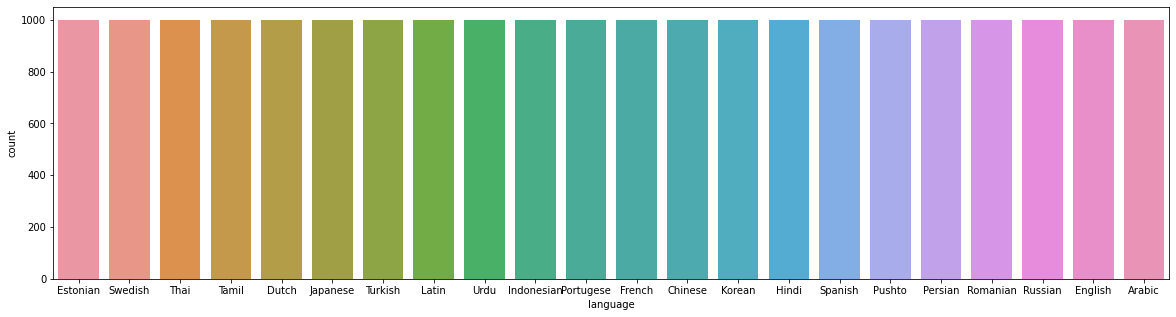

In [9]:
################################################
# your implementation goes here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.countplot(data.language)
plt.show()
##################################################

### Question 2-5. Explore the data with your own preprocessing and train your model

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

X=data['Text']
y=data['language']


################################################
# your implementation goes here

#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#y = le.fit_transform(y)

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb = Pipeline([('vect', CountVectorizer()),
                ('clf', MultinomialNB()),
                ])

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

################################################

accuracy 0.9427272727272727


## FastText for language detection

## FastText training setup 

In [11]:
! wget http://downloads.tatoeba.org/exports/sentences.tar.bz2

--2023-01-03 15:12:42--  http://downloads.tatoeba.org/exports/sentences.tar.bz2
Resolving downloads.tatoeba.org (downloads.tatoeba.org)... 94.130.77.194
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.tatoeba.org/exports/sentences.tar.bz2 [following]
--2023-01-03 15:12:42--  https://downloads.tatoeba.org/exports/sentences.tar.bz2
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172433658 (164M) [application/octet-stream]
Saving to: ‘sentences.tar.bz2’

sentences.tar.bz2   100%[===================>] 164.45M  20.0MB/s    in 9.2s    

2023-01-03 15:12:52 (17.8 MB/s) - ‘sentences.tar.bz2’ saved [172433658/172433658]



In [12]:
! bunzip2 sentences.tar.bz2

In [13]:
! ls

dataset.csv  dataset.csv.zip  LICENSE  README.md  sentences.tar


In [14]:
! tar xvf sentences.tar

sentences.csv


In [15]:
! ls

dataset.csv  dataset.csv.zip  LICENSE  README.md  sentences.csv  sentences.tar


In [16]:
! head -10 sentences.csv

1	cmn	我們試試看！
2	cmn	我该去睡觉了。
3	cmn	你在干什麼啊？
4	cmn	這是什麼啊？
5	cmn	今天是６月１８号，也是Muiriel的生日！
6	cmn	生日快乐，Muiriel！
7	cmn	Muiriel现在20岁了。
8	cmn	密码是"Muiriel"。
9	cmn	我很快就會回來。
10	cmn	我不知道。


In [17]:
! awk -F"\t" '{print"__label__"$2" "$3}' < sentences.csv | shuf > all.txt

In [18]:
! ls

all.txt      dataset.csv.zip  README.md      sentences.tar
dataset.csv  LICENSE	      sentences.csv


In [19]:
! head -5 all.txt

__label__eng Tom noticed that Mary had noticed that he had noticed.
__label__lat Nōn videō quid dubitandum sit.
__label__deu Sie haben die Brücke termingerecht fertiggestellt.
__label__tur Neden şimdi onu yapamıyoruz?
__label__mkd Ти се случило ли тебе?


In [20]:
! head -n 10000 all.txt > valid.txt

In [21]:
! tail -n +10001 all.txt > train.txt

In [22]:
! head -5 train.txt

__label__ita Non aprirlo, per piacere.
__label__tur Bu ceketle giden bir kravat istiyorum.
__label__eng I'm working from home.
__label__rus Том встретится сегодня с Мэри.
__label__eng You know the one I'm talking about, right?


### Question 6.1. Train fasttext model on Tatoeba (2 points)

In [ ]:
%%time
import fasttext

# Check the fasttext library and implement the training
###########################################

# your implementation goes here

pass
################################################

# @TODO: Save your model when trained 
# model.save_model("langdetect.bin")

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 15.3 µs


In [ ]:
# Sanity check 
model.predict("I am French and I love English")

(('__label__eng',), array([1.00001001]))

### Question 6.2. Evaluate performance of fasttext model on valid.txt (1 point)

In [ ]:
# Hint: Create dataframe from valid.txt and evaluate performance 

###########################################

# your implementation goes here

pass
################################################

### Question 7 & 8. Test your FastText model on the same dataset as question 5.

In [ ]:
###########################################

# your implementation goes here

pass
################################################

In [ ]:
###########################################

# your implementation goes here

pass
################################################